In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy as sp
from scipy.stats import skewnorm

In [38]:
def skew_normal(x, a, loc, scale,amp):
    return amp*skewnorm.cdf(x, a, loc=loc, scale=scale)

In [80]:
keV11 = pd.read_csv("Xray/alla/mo_la",delimiter="\t")
keV12 = pd.read_csv("Xray/12keV",delimiter="\t")
keV13 = pd.read_csv("Xray/13keV",delimiter="\t")
keV14 = pd.read_csv("Xray/14keV",delimiter="\t")
keV15 = pd.read_csv("Xray/15keV",delimiter="\t")

datakeV11 = np.hstack((np.reshape(keV11["z (nm)"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV11["PRZ(pz) Emi"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1))))
datakeV12 = np.hstack((np.reshape(keV12["z (nm)"].to_numpy(),(len(keV12["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV12["PRZ(pz) Emi"].to_numpy(),(len(keV12["PRZ(pz) Emi"].to_numpy()),1))))
datakeV13 = np.hstack((np.reshape(keV13["z (nm)"].to_numpy(),(len(keV13["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV13["PRZ(pz) Emi"].to_numpy(),(len(keV13["PRZ(pz) Emi"].to_numpy()),1))))
datakeV14 = np.hstack((np.reshape(keV14["z (nm)"].to_numpy(),(len(keV14["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV14["PRZ(pz) Emi"].to_numpy(),(len(keV14["PRZ(pz) Emi"].to_numpy()),1))))
datakeV15 = np.hstack((np.reshape(keV15["z (nm)"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV15["PRZ(pz) Emi"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1))))


3.40318


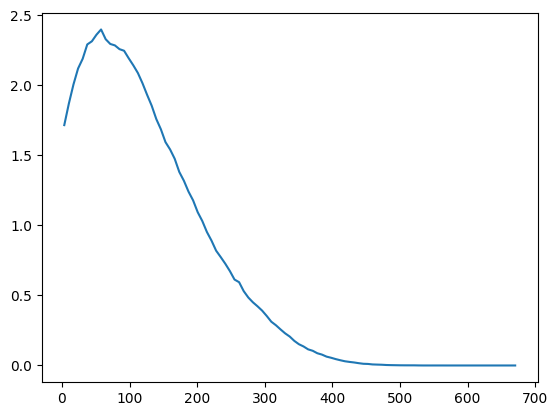

In [81]:
plt.plot(datakeV11[:,0],datakeV11[:,1])
print(datakeV11[0,0])
# plt.xlim((0,10))

plt.show()

In [49]:
def find_nearest(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
def find_nearest_id(array, value):
    # Function for finding closest value in array
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def integration(data,zmax,phi=35,rho=2,mu=0.01):
    z = data[:,0]
    y = data[:,1]#*np.exp(-(mu/rho)*np.sin(phi*rho*z)**-1)
    zmax_id = find_nearest_id(z,zmax)
    # print(y)
    
    integral = np.sum(np.reshape(y[:zmax_id],-1))
    
    return integral,z[zmax_id]

def parintegration(data,zmax,a=35,b=2,mu=0.01):
    z = data[:,0]
    y = data[:,1]*np.exp(-a*np.sin(b*z)**-1)
    zmax_id = find_nearest_id(z,zmax)
    # print(y)
    
    integral = np.sum(np.reshape(y[:zmax_id],-1))
    
    return integral,z[zmax_id]

def thicknesstrend(data,z):
    zstops = np.linspace(0,z,z)
    k1 = np.array([])
    zta = np.array([])
    sak = 0
    for i in zstops:
        gral, zte = integration(data,i)
        if gral!=sak:
            k1 = np.append(k1,gral)
            zta = np.append(zta,zte)
        elif i==0:
            k1 = np.append(k1,gral)
            zta = np.append(zta,zte)
        sak = gral

    k1 = k1/np.max(k1)
    dataut = np.hstack((np.array([zta]).T,np.array([k1]).T))
    return dataut
    

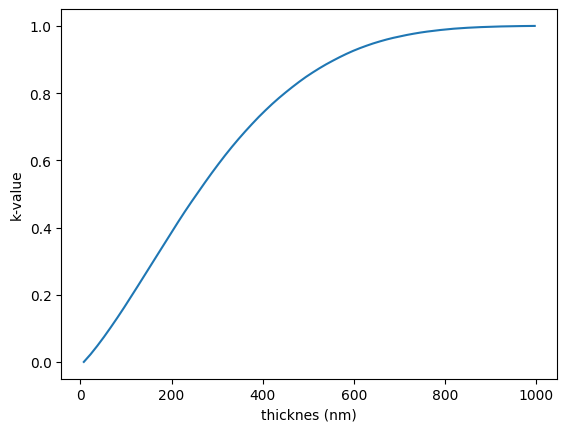

In [56]:
k2 = np.array([])

zstops = np.linspace(0,1000,1000)
ztb = np.array([])

datakeV11 = np.hstack((np.reshape(keV11["z (nm)"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV11["PRZ(pz) Emi"].to_numpy(),(len(keV11["PRZ(pz) Emi"].to_numpy()),1))))

for i in zstops:
    gral, zte = integration(datakeV11,i)
    k2 = np.append(k2,gral)
    ztb = np.append(ztb,zte)

k2 = k2/np.max(k2)
c11 = np.polyfit(ztb[200:250],k2[200:250],1)
plt.plot(ztb,k2)
# plt.plot(zta[:400],c11[0]*zta[:400]+c11[1])
plt.xlabel("thicknes (nm)")
plt.ylabel("k-value")
# plt.xlim((0,200))
plt.show()
    

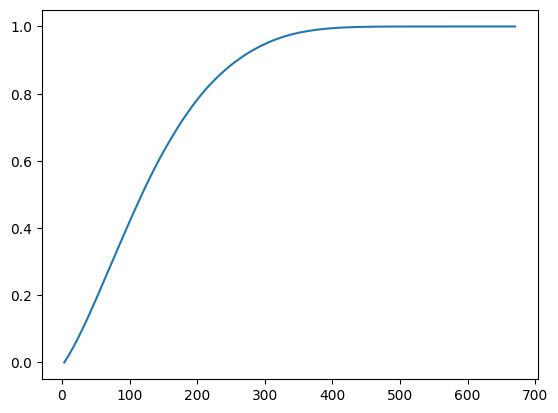

In [74]:
keV11 = pd.read_csv("Xray/alla/mo_lg",delimiter="\t")

k2 = np.array([])

zstops = np.linspace(0,1000,1000)
ztb = np.array([])

datakeV11 = np.hstack((np.reshape(keV11["z (nm)"].to_numpy(),(len(keV11["PRZ(pz) Gen"].to_numpy()),1)),np.reshape(keV11["PRZ(pz) Gen"].to_numpy(),(len(keV11["PRZ(pz) Gen"].to_numpy()),1))))

for i in zstops:
    gral, zte = integration(datakeV11,i)
    k2 = np.append(k2,gral)
    ztb = np.append(ztb,zte)

k2 = k2/np.max(k2)

array = np.vstack((ztb,k2))
np.savetxt("Xray/mo_lg.csv",array.T)
plt.plot(array.T[:,0],array.T[:,1])

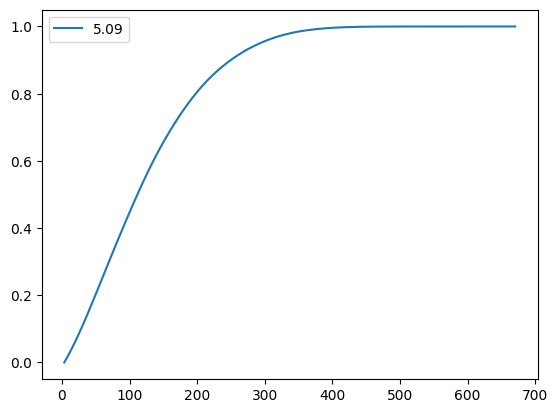

In [73]:
mo_la = np.loadtxt("Xray/mo_la.csv")
mo_lb1 = np.loadtxt("Xray/mo_lb1.csv")
mo_lb2 = np.loadtxt("Xray/mo_lb2.csv")
mo_lg = np.loadtxt("Xray/mo_lg.csv")
s_a1 = np.loadtxt("Xray/s_a1.csv")
s_a2 = np.loadtxt("Xray/s_a2.csv")
s_kb1 = np.loadtxt("Xray/s_kb1.csv")
A=5.96e4
y = mo_la[:,1]*5.96e4/A + mo_lb1[:,1]*3.23e4/A + mo_lb2[:,1]*1.79e3/A + mo_lg[:,1]*8.8e2/A + s_a1[:,1]*3.05e4/A + s_a2[:,1]*1.54e4/A + s_kb1[:,1]*2.9e3/A

y = y/np.max(y)
np.savetxt("test", np.vstack((mo_la[:,0],y)).T)
plt.plot(mo_la[:,0],y,label="5.09")
# plt.xlim((100,200))
plt.legend()
plt.show()

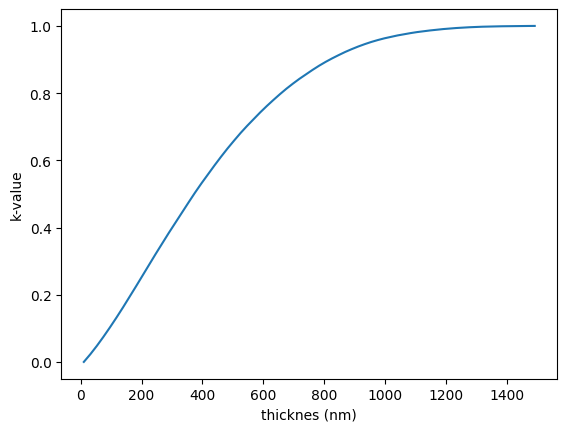

In [7]:
k1 = np.array([])

zstops = np.linspace(0,1500,1500)
zta = np.array([])

datakeV15 = np.hstack((np.reshape(keV15["z (nm)"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV15["PRZ(pz) Emi"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1))))

for i in zstops:
    gral, zte = integration(datakeV15,i)
    k1 = np.append(k1,gral)
    zta = np.append(zta,zte)

k1 = k1/np.max(k1)
c15 = np.polyfit(zta[200:250],k1[200:250],1)
plt.plot(zta,k1)
# plt.plot(zta[:400],c15[0]*zta[:400]+c15[1])
plt.xlabel("thicknes (nm)")
plt.ylabel("k-value")
# plt.xlim((0,1000))
# plt.ylim((0,70))
plt.show()
    

-432.0823373429296 -275.2212558572744 113.5268575729198 0.7351865938815555
431.33766003883335


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


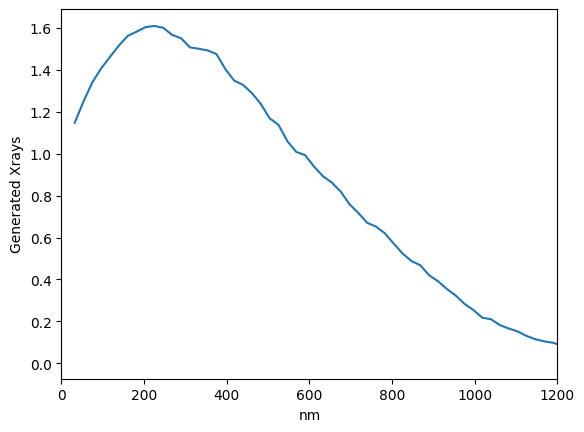

In [8]:
dk1 = np.gradient(k1)
dk2 = np.gradient(k2)
dk1_nonzero = dk1!=0
dk2_nonzero = dk2!=0
z1 = dk1[dk1_nonzero]
z2 = dk2[dk2_nonzero]

zta1 = zta[dk1_nonzero]

arraytobe = np.vstack((z1,zta1)).T

# arraytobe = np.unique(arraytobe,axis=0)
jaha = np.zeros_like(arraytobe)

for i in range(arraytobe.shape[0]-1):
    if arraytobe[i,0] != arraytobe[i+1,0]:
        jaha[i,:] = arraytobe[i,:]
jaha = jaha[jaha[:,0]!=0] 



ztb1 = ztb[dk2_nonzero]

mean = sum(jaha[:,1] * jaha[:,0]) / sum(jaha[:,0])
sigma = np.sqrt(sum(jaha[:,0] * (jaha[:,1] - mean) ** 2) / sum(jaha[:,0]))

def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))*0.5*(sp.special.erf(x-x0)/(2*sigma))

popt,pcov = sp.optimize.curve_fit(skew_normal,xdata=jaha[:,1],ydata=jaha[:,0]*100,p0=[0.001,400,1,1])

fig,ax = plt.subplots(1)
fig.figsize = (15,8)

ax.plot(jaha[:,1],jaha[:,0]*100)
print(*popt)
print(mean)
x=np.linspace(0,1400,100)
# plt.plot(x,gaus(x,1.52696371,244.48906856,389.57709312))
# plt.plot(x,gaus(x,1.60532407,213.5991609,224.78969303))
# ax.plot(x,skew_normal(x,*popt))
# plt.xlim(0,200)
ax.set_xlabel("nm")
ax.set_ylabel(r"Generated Xrays")
ax.set_xlim(0,1200)
plt.show()

[6.79252807e+04 2.32459679e+02 1.11522273e+07 1.38398337e+07]

[  5.99340483  34.34834753 276.08495411   1.00417579]

[  8.2063981   15.15542802 145.44510962   1.00264994]


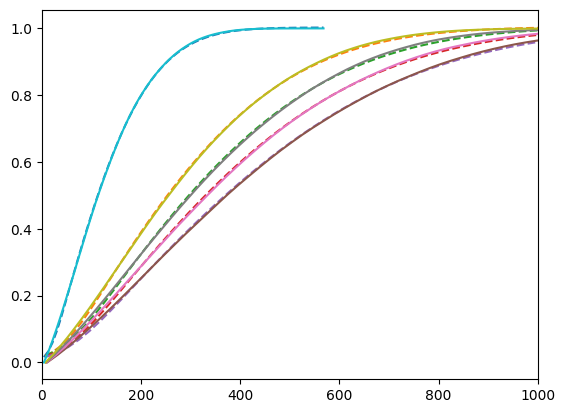

In [9]:
data15 = thicknesstrend(datakeV15,1500)
data14 = thicknesstrend(datakeV14,1500)
data13 = thicknesstrend(datakeV13,1500)
data12 = thicknesstrend(datakeV12,1500)
data11 = thicknesstrend(datakeV11,1500)

popt11,pcov = sp.optimize.curve_fit(skew_normal,xdata=data11[:,0],ydata=data11[:,1],p0=[0.001,1,488,1])
popt12,pcov = sp.optimize.curve_fit(skew_normal,xdata=data12[:,0],ydata=data12[:,1],p0=[0.001,1,488,1])
popt13,pcov = sp.optimize.curve_fit(skew_normal,xdata=data13[:,0],ydata=data13[:,1],p0=[0.001,1,488,1])
popt14,pcov = sp.optimize.curve_fit(skew_normal,xdata=data14[:,0],ydata=data14[:,1],p0=[0.001,1,488,1])
popt15,pcov = sp.optimize.curve_fit(skew_normal,xdata=data15[:,0],ydata=data15[:,1],p0=[0.001,1,488,1])
print(popt11)

plt.plot(data11[:,0],skew_normal(data11[:,0],*popt11),linestyle="dashed")
plt.plot(data12[:,0],skew_normal(data12[:,0],*popt12),linestyle="dashed")
plt.plot(data13[:,0],skew_normal(data13[:,0],*popt13),linestyle="dashed")
plt.plot(data14[:,0],skew_normal(data14[:,0],*popt14),linestyle="dashed")
plt.plot(data15[:,0],skew_normal(data15[:,0],*popt15),linestyle="dashed")

plt.plot(data15[:,0],data15[:,1])
plt.plot(data14[:,0],data14[:,1])
plt.plot(data13[:,0],data13[:,1])
plt.plot(data12[:,0],data12[:,1])
plt.plot(data11[:,0],data11[:,1])
plt.xlim((0,1000))
plt.show()


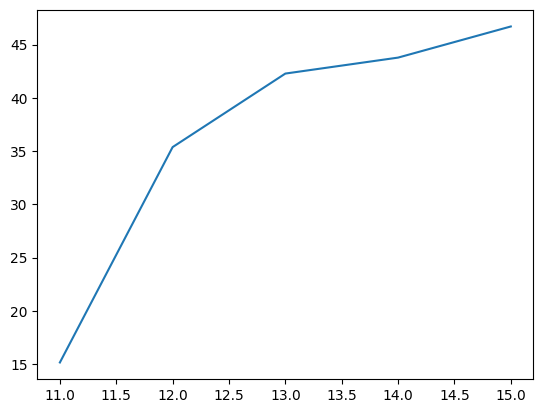

In [10]:
kev = np.array([11,12,13,14,15])
# plt.plot(kev, [popt11[0],popt12[0],popt13[0],popt14[0],popt15[0]])
plt.plot(kev, [popt11[1],popt12[1],popt13[1],popt14[1],popt15[1]])
# plt.plot(kev, [popt11[2],popt12[2],popt13[2],popt14[2],popt15[2]])
# plt.plot(kev, [popt11[3],popt12[3],popt13[3],popt14[3],popt15[3]])

Intergartion and investigating the effect of parameter

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.6942107895543447e-05
        x: [ 7.941e+00  4.667e+01  4.841e+02  1.009e+00]
      nit: 0
      jac: [-4.889e-11  3.865e-12  2.274e-13  5.665e-09]
 hess_inv: [[1 0 0 0]
            [0 1 0 0]
            [0 0 1 0]
            [0 0 0 1]]
     nfev: 5
     njev: 1


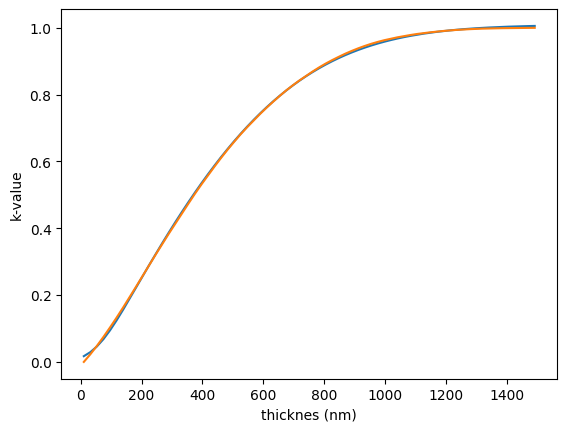

0.0


In [11]:
k1 = np.array([])

zstops = np.linspace(0,1500,1500)
zta = np.array([])

datakeV15 = np.hstack((np.reshape(keV15["z (nm)"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1)),np.reshape(keV15["PRZ(pz) Emi"].to_numpy(),(len(keV15["PRZ(pz) Emi"].to_numpy()),1))))

for i in zstops:
    gral, zte = integration(datakeV15,i)
    k1 = np.append(k1,gral)
    zta = np.append(zta,zte)

k1 = k1/np.max(k1)
c15 = np.polyfit(zta[200:250],k1[200:250],1)
popt = [0,0,0,0]

def cost(params):
    model = skew_normal(zta,*params)
    weight = np.ones_like(zta)
    for i in range(len(zta)):
        weight[i] = (len(zta)-i)/len(zta)**2
    reg = np.sum(params**2)
    return np.mean(((model-k1))**2)

popt = sp.optimize.minimize(cost,x0=[7.94136217,46.66724091,484.09669123,1.00866597])
# popt,pcov = sp.optimize.curve_fit(skew_normal,xdata=zta,ydata=k1,p0=[0.001,1,200,1])
print(popt)

plt.plot(zta,skew_normal(zta,*popt.x))
plt.plot()
plt.plot(zta,k1)
# plt.plot(zta[:400],c15[0]*zta[:400]+c15[1])
plt.xlabel("thicknes (nm)")
plt.ylabel("k-value")
# plt.xlim((0,20))
# plt.ylim((0,0.2))
plt.show()
print(k1[0])